In [ ]:
import os
import numpy as np
import skimage
from skimage.transform import resize
from skimage.io import imsave, imread

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

data_directory = '/content/drive/My Drive/DATASET/source'
output_directory = '/content/drive/My Drive/DATASET/AugmentedDataset'

for folder_name in os.listdir(data_directory):
    folder_path = os.path.join(data_directory, folder_name)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        print("Data for {folder name} is {len(files)}")

Data for {folder name} is {len(files)}
Data for {folder name} is {len(files)}
Data for {folder name} is {len(files)}
Data for {folder name} is {len(files)}
Data for {folder name} is {len(files)}
Data for {folder name} is {len(files)}
Data for {folder name} is {len(files)}
Data for {folder name} is {len(files)}


In [ ]:
!pip install Augmentor

In [ ]:
folder_names = ['Autoimun_Dermatomyositis', 'Autoimun_Lichen_Planus',
                'Autoimun_Psoriasis', 'Autoimun_Vitiligo', 'Nonautoimun_Eczema',
                'Nonautoimun_Herpes', 'Nonautoimun_Keratosis_Seborrheic', 'Nonautoimun_Tinea']

import Augmentor

for folder_name in folder_names:
    folder_path = os.path.join(data_directory, folder_name)
    source_dir = os.path.join(data_directory, folder_name)
    output_dir = os.path.join(output_directory, folder_name)
    p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir, save_format="jpg")
    p.rotate(probability = 0.7, max_left_rotation = 10, max_right_rotation = 10)
    p.flip_left_right(probability = 0.5)
    p.flip_top_bottom(probability = 0.5)
    p.zoom_random(probability = 0.5, percentage_area = 0.8)
    p.crop_random(probability = 0.5, percentage_area = 0.8)
    p.resize(probability = 1.0, width = 224, height = 224)
    p.random_brightness(probability = 0.5, min_factor = 0.8, max_factor = 1.2)
    p.random_contrast(probability = 0.5, min_factor = 0.8, max_factor = 1.2)
    p.sample(1500)

import pathlib

augmented_data_directory = pathlib.Path(output_directory)
image_count_train = len(list(augmented_data_directory.glob('*/*.jpg')))
print(f"Total augmented images: {image_count_train}")

Initialised with 128 image(s) found.
Output directory set to /content/drive/My Drive/DATASET/AugmentedDataset/Autoimun_Dermatomyositis.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x784DCEBAB490>: 100%|██████████| 1500/1500 [07:09<00:00,  3.49 Samples/s]


Initialised with 251 image(s) found.
Output directory set to /content/drive/My Drive/DATASET/AugmentedDataset/Autoimun_Lichen_Planus.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x784E689AF350>: 100%|██████████| 1500/1500 [01:08<00:00, 21.86 Samples/s]


Initialised with 667 image(s) found.
Output directory set to /content/drive/My Drive/DATASET/AugmentedDataset/Autoimun_Psoriasis.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x784DBFE93010>: 100%|██████████| 1500/1500 [01:11<00:00, 20.96 Samples/s]


Initialised with 368 image(s) found.
Output directory set to /content/drive/My Drive/DATASET/AugmentedDataset/Autoimun_Vitiligo.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x784DBF567F90>: 100%|██████████| 1500/1500 [00:19<00:00, 76.51 Samples/s]


Initialised with 512 image(s) found.
Output directory set to /content/drive/My Drive/DATASET/AugmentedDataset/Nonautoimun_Eczema.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x784DBFB05AD0>: 100%|██████████| 1500/1500 [00:29<00:00, 51.61 Samples/s]


Initialised with 222 image(s) found.
Output directory set to /content/drive/My Drive/DATASET/AugmentedDataset/Nonautoimun_Herpes.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x784DBF878B50>: 100%|██████████| 1500/1500 [00:28<00:00, 53.51 Samples/s]


Initialised with 208 image(s) found.
Output directory set to /content/drive/My Drive/DATASET/AugmentedDataset/Nonautoimun_Keratosis_Seborrheic.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x784DBEDF29D0>: 100%|██████████| 1500/1500 [00:28<00:00, 52.23 Samples/s]


Initialised with 408 image(s) found.
Output directory set to /content/drive/My Drive/DATASET/AugmentedDataset/Nonautoimun_Tinea.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x784DBF25D3D0>: 100%|██████████| 1500/1500 [00:28<00:00, 52.18 Samples/s]


Total augmented images: 12000


In [ ]:
import os

data_directory = '/content/drive/My Drive/DATASET/source'
output_directory = '/content/drive/My Drive/DATASET/AugmentedDataset'

print(f"----------DATA SEBELUM DILAKUKAN AUGMENTASI----------")

for folder_name in os.listdir(data_directory):
    folder_path = os.path.join(data_directory, folder_name)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        print(f"Folder {folder_name} memiliki Jumlah Data: {len(files)}")

print(f" ")

print(f"----------DATA SETELAH DILAKUKAN AUGMENTASI----------")

for folder_name in os.listdir(output_directory):
    folder_path = os.path.join(output_directory, folder_name)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        print(f"Folder {folder_name} memiliki Jumlah Data: {len(files)}")

----------DATA SEBELUM DILAKUKAN AUGMENTASI----------
Folder Autoimun_Lichen_Planus memiliki Jumlah Data: 251
Folder Autoimun_Dermatomyositis memiliki Jumlah Data: 128
Folder Nonautoimun_Keratosis_Seborrheic memiliki Jumlah Data: 208
Folder Nonautoimun_Tinea memiliki Jumlah Data: 408
Folder Nonautoimun_Herpes memiliki Jumlah Data: 222
Folder Autoimun_Psoriasis memiliki Jumlah Data: 667
Folder Autoimun_Vitiligo memiliki Jumlah Data: 368
Folder Nonautoimun_Eczema memiliki Jumlah Data: 512
 
----------DATA SETELAH DILAKUKAN AUGMENTASI----------
Folder Autoimun_Dermatomyositis memiliki Jumlah Data: 1500
Folder Autoimun_Lichen_Planus memiliki Jumlah Data: 1500
Folder Autoimun_Psoriasis memiliki Jumlah Data: 1500
Folder Autoimun_Vitiligo memiliki Jumlah Data: 1500
Folder Nonautoimun_Eczema memiliki Jumlah Data: 1500
Folder Nonautoimun_Herpes memiliki Jumlah Data: 1500
Folder Nonautoimun_Keratosis_Seborrheic memiliki Jumlah Data: 1500
Folder Nonautoimun_Tinea memiliki Jumlah Data: 1500


<ipython-input-7-a001fd2da47a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='dark:salmon_r')


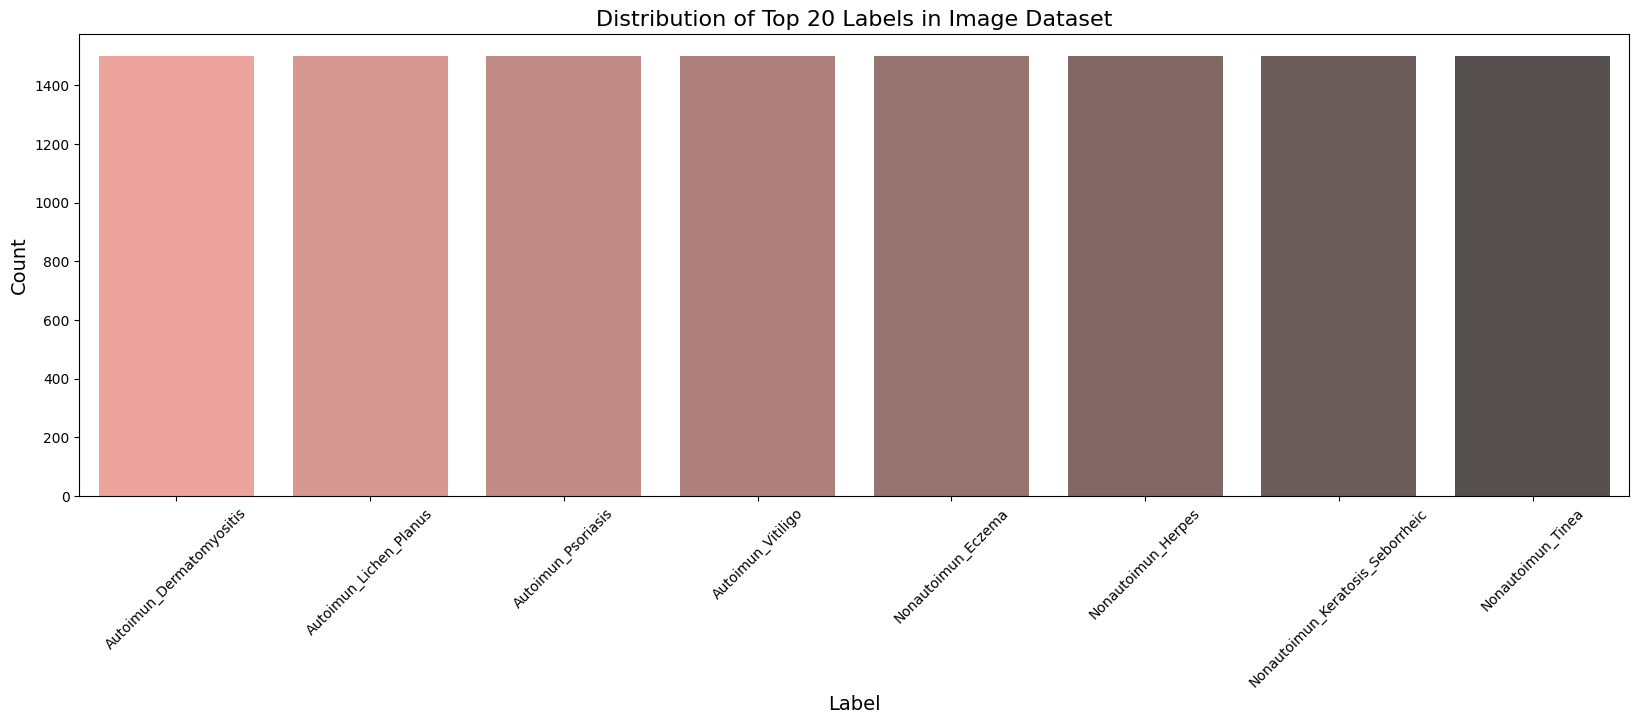

In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

image_dir = Path(output_directory)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png'))  + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.gif'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Get the top 20 labels
label_counts = image_df['Label'].value_counts()[:20]

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='dark:salmon_r')
plt.title('Distribution of Top 20 Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

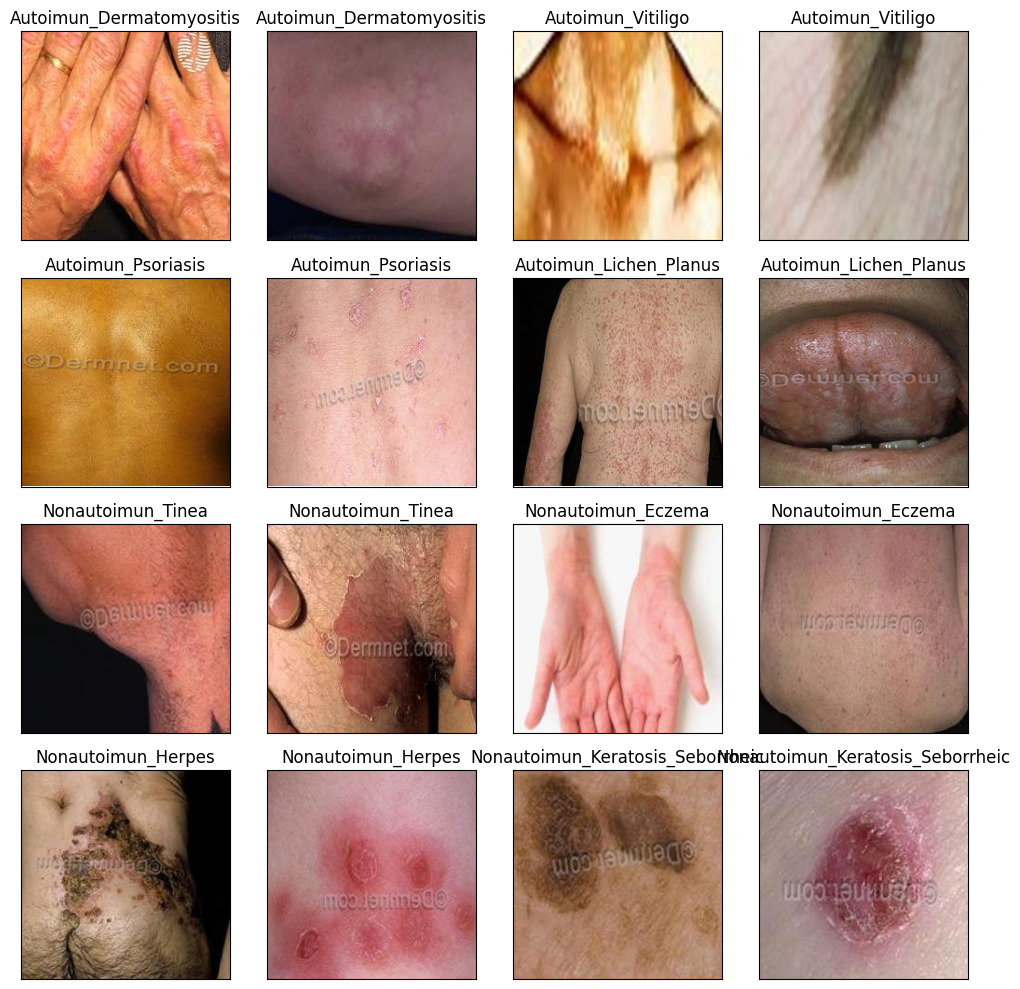

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

output_directory = '/content/drive/My Drive/DATASET/AugmentedDataset'
diseases = ['Autoimun_Dermatomyositis', 'Autoimun_Vitiligo', 'Autoimun_Psoriasis', 'Autoimun_Lichen_Planus',
            'Nonautoimun_Tinea', 'Nonautoimun_Eczema', 'Nonautoimun_Herpes', 'Nonautoimun_Keratosis_Seborrheic']

num_images_per_disease = 2

# Collect image paths for each disease
image_paths = []
for disease in diseases:
    disease_dir = os.path.join(output_directory, disease)
    image_files = [f for f in os.listdir(disease_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    image_paths.extend([os.path.join(disease_dir, f) for f in random.sample(image_files, num_images_per_disease)])

# Display the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(image_paths[i])
    ax.imshow(img)
    ax.set_title(os.path.basename(os.path.dirname(image_paths[i])))  # Extract disease name from path
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split # import train_test_split

train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

In [ ]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 5760 validated image filenames belonging to 8 classes.
Found 3840 validated image filenames belonging to 8 classes.
Found 2400 validated image filenames belonging to 8 classes.


In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

resize_and_rescale = tf.keras.Sequential([
  Resizing(224, 224),
  Rescaling(1./255)
])

inputs = pretrained_model.input
x = resize_and_rescale(inputs)
x = Flatten()(pretrained_model.output)
x = Dropout(0.25)(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)

outputs = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer=tf.keras.optimizers.Adamax(learning_rate=1e-4)

for layer in pretrained_model.layers[-20:]:
  layer.trainable = True

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,154,376 (92.14 MB)

 Trainable params: 8,444,808 (32.21 MB)

 Non-trainable params: 15,709,568 (59.93 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

ModelCheckpoint = ModelCheckpoint("resnet50.weights.h5", monitor='val_accuracy', verbose=1,
                                  save_best_only=True, mode='max', save_weights_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10,
                               restore_best_weights=True)

history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=50,
                    callbacks=[ModelCheckpoint, early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2142 - loss: 2.3358 
Epoch 1: val_accuracy improved from -inf to 0.50885, saving model to resnet50.weights.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 3564s 20s/step - accuracy: 0.2147 - loss: 2.3342 - val_accuracy: 0.5089 - val_loss: 1.3631
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.4367 - loss: 1.5970
Epoch 2: val_accuracy improved from 0.50885 to 0.60703, saving model to resnet50.weights.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 144s 800ms/step - accuracy: 0.4368 - loss: 1.5968 - val_accuracy: 0.6070 - val_loss: 1.1224
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.4964 - loss: 1.3750
Epoch 3: val_accuracy improved from 0.60703 to 0.65312, saving model to resnet50.weights.h5
180/180 ━━━━━━━━━━━━━━━━━━━━ 146s 812ms/step - accuracy: 0.4964 - loss: 1.3749 - val_accuracy: 0.6531 - val_loss: 0.9755
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.5498 - loss: 1.2205
Epoch 4: val_a

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.39314
Test Accuracy: 91.17%


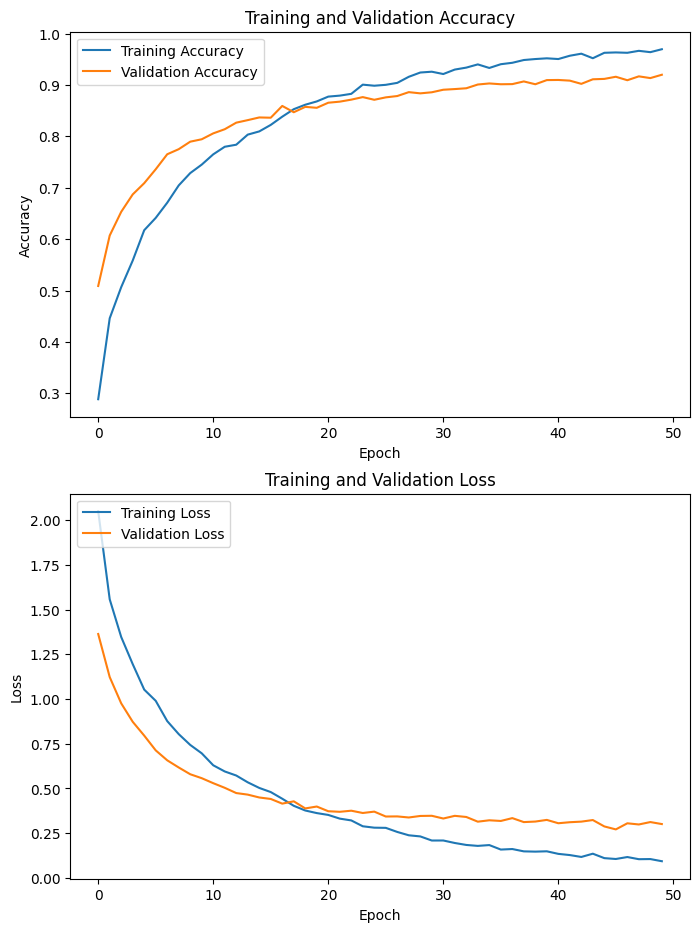

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 10 predictions: {pred[:10]}')

75/75 ━━━━━━━━━━━━━━━━━━━━ 850s 11s/step
The first 10 predictions: ['Autoimun_Psoriasis', 'Nonautoimun_Eczema', 'Autoimun_Lichen_Planus', 'Nonautoimun_Keratosis_Seborrheic', 'Autoimun_Dermatomyositis', 'Nonautoimun_Keratosis_Seborrheic', 'Autoimun_Vitiligo', 'Nonautoimun_Herpes', 'Autoimun_Lichen_Planus', 'Autoimun_Vitiligo']


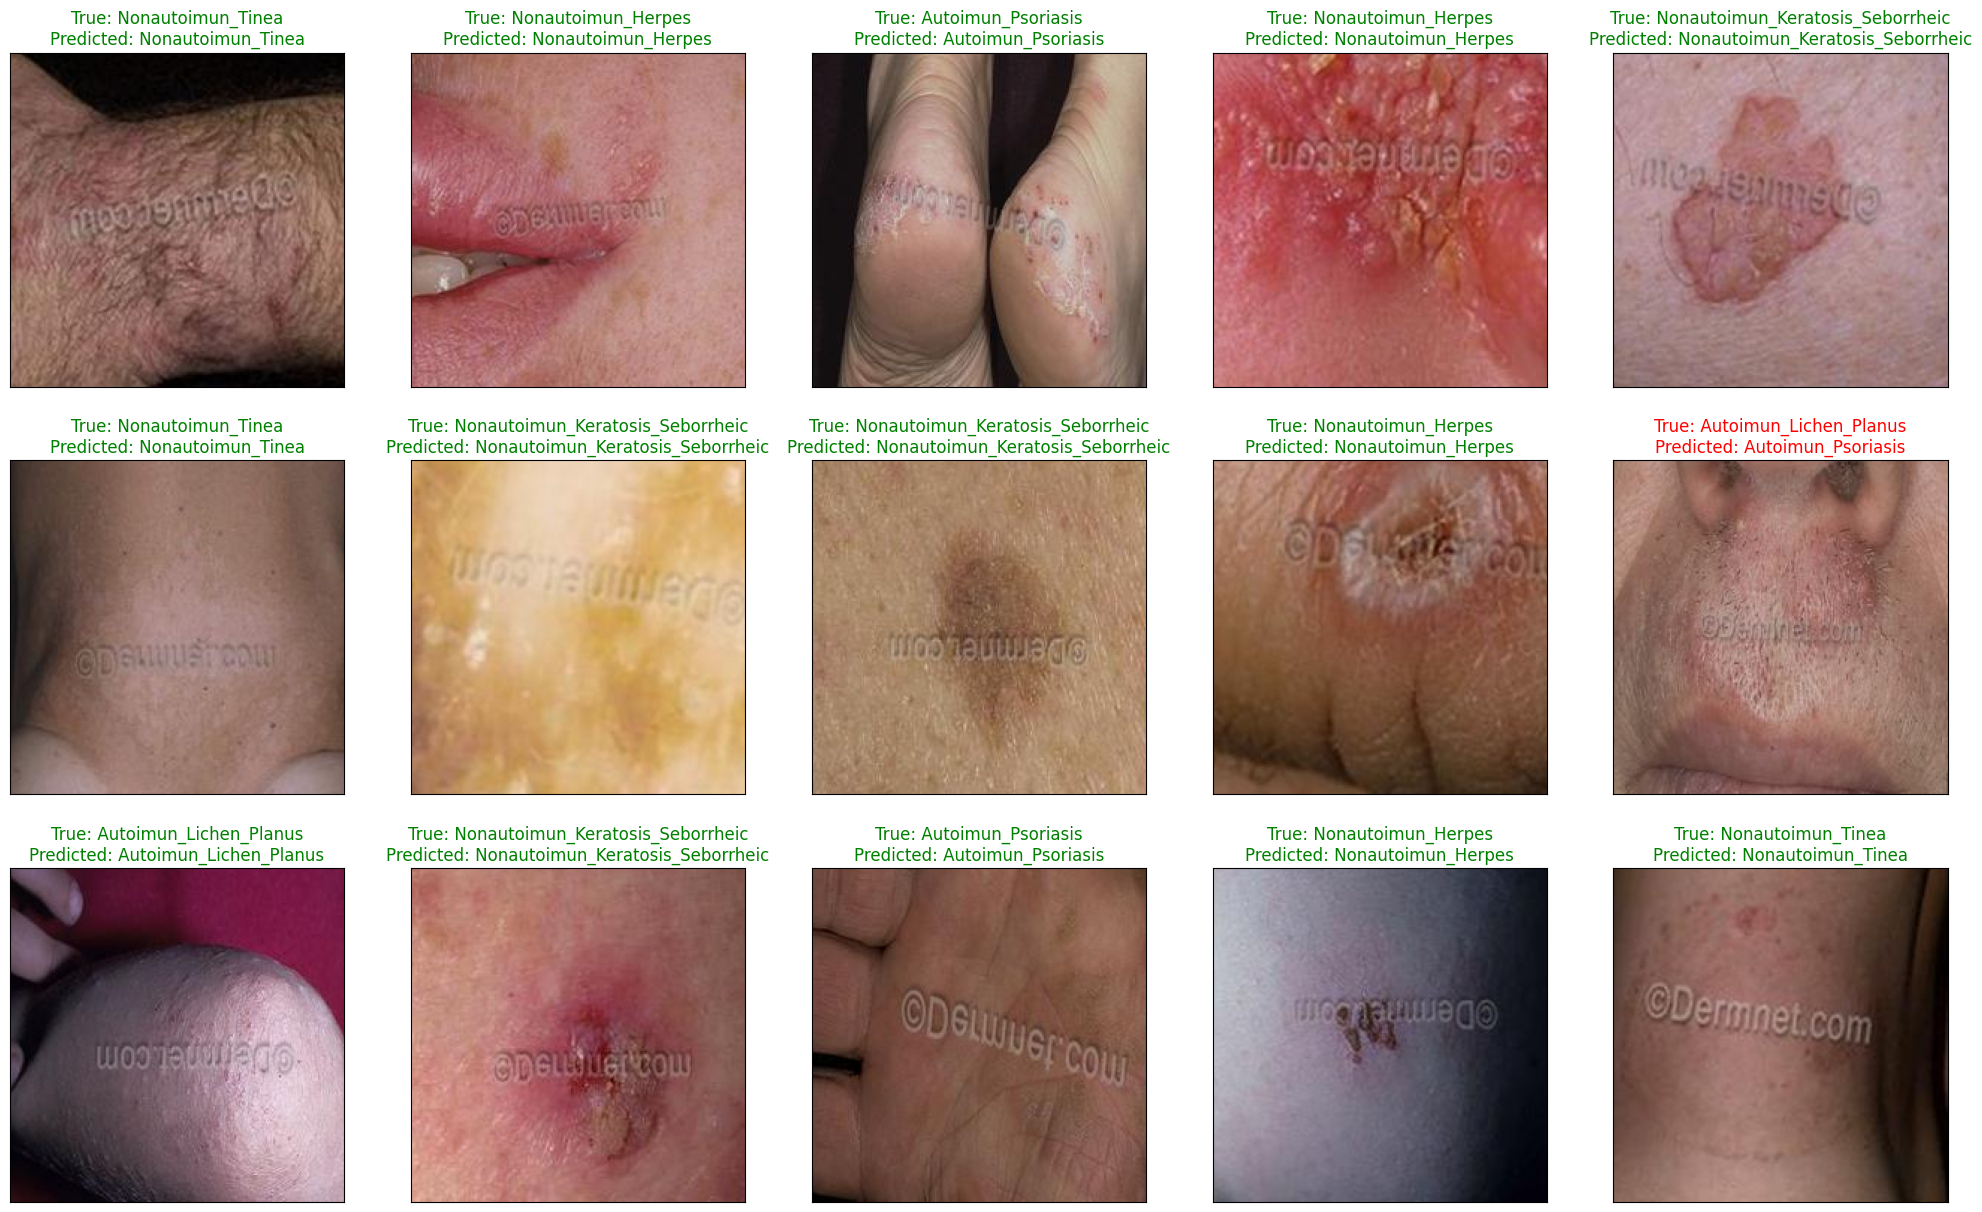

<Figure size 640x480 with 0 Axes>

In [ ]:
 # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report  # Import the classification_report function

y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                                  precision    recall  f1-score   support

        Autoimun_Dermatomyositis       0.97      1.00      0.98       308
          Autoimun_Lichen_Planus       0.91      0.90      0.91       304
              Autoimun_Psoriasis       0.73      0.94      0.82       318
               Autoimun_Vitiligo       1.00      1.00      1.00       306
              Nonautoimun_Eczema       0.92      0.73      0.82       278
              Nonautoimun_Herpes       0.94      0.94      0.94       290
Nonautoimun_Keratosis_Seborrheic       0.98      0.98      0.98       295
               Nonautoimun_Tinea       0.90      0.78      0.83       301

                        accuracy                           0.91      2400
                       macro avg       0.92      0.91      0.91      2400
                    weighted avg       0.92      0.91      0.91      2400



In [ ]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score      support
Autoimun_Dermatomyositis           0.968553  1.000000  0.984026   308.000000
Autoimun_Lichen_Planus             0.910299  0.901316  0.905785   304.000000
Autoimun_Psoriasis                 0.731707  0.943396  0.824176   318.000000
Autoimun_Vitiligo                  1.000000  1.000000  1.000000   306.000000
Nonautoimun_Eczema                 0.922727  0.730216  0.815261   278.000000
Nonautoimun_Herpes                 0.944637  0.941379  0.943005   290.000000
Nonautoimun_Keratosis_Seborrheic   0.983051  0.983051  0.983051   295.000000
Nonautoimun_Tinea                  0.896552  0.777409  0.832740   301.000000
accuracy                           0.911667  0.911667  0.911667     0.911667
macro avg                          0.919691  0.909596  0.911005  2400.000000
weighted avg                       0.918355  0.911667  0.911373  2400.000000

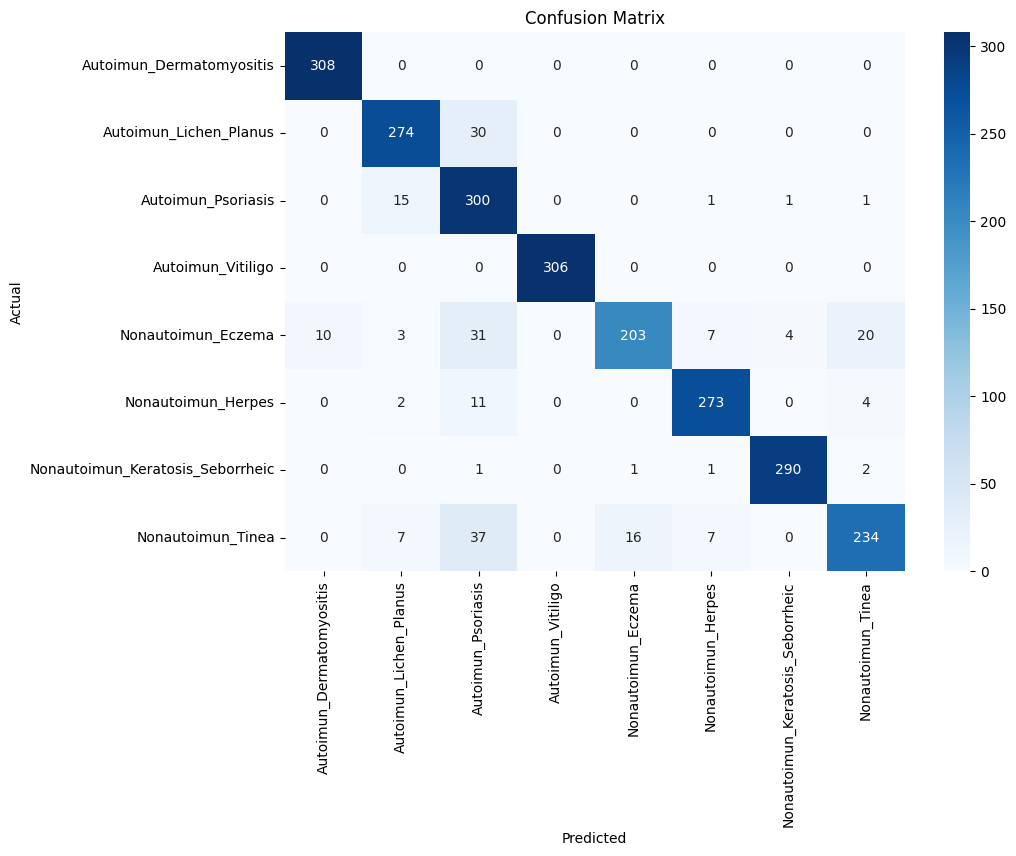

In [ ]:
# Import the necessary function from scikit-learn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def make_confusion_matrix(y_true, y_pred, labels):
    """
    Generates and displays a confusion matrix.

    Args:
        y_true: The true labels.
        y_pred: The predicted labels.
        labels: A list of label names.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


# Now you can use make_confusion_matrix in your code
# Use the complete y_test list instead of slicing it to match the length of pred
make_confusion_matrix(y_test, pred, list(labels.values()))

In [ ]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

# Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

        # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
import tensorflow as tf

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))

    return cam_path


preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "conv5_block3_3_conv"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].activation = None

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
<ipython-input-22-54da5c43e4d5>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


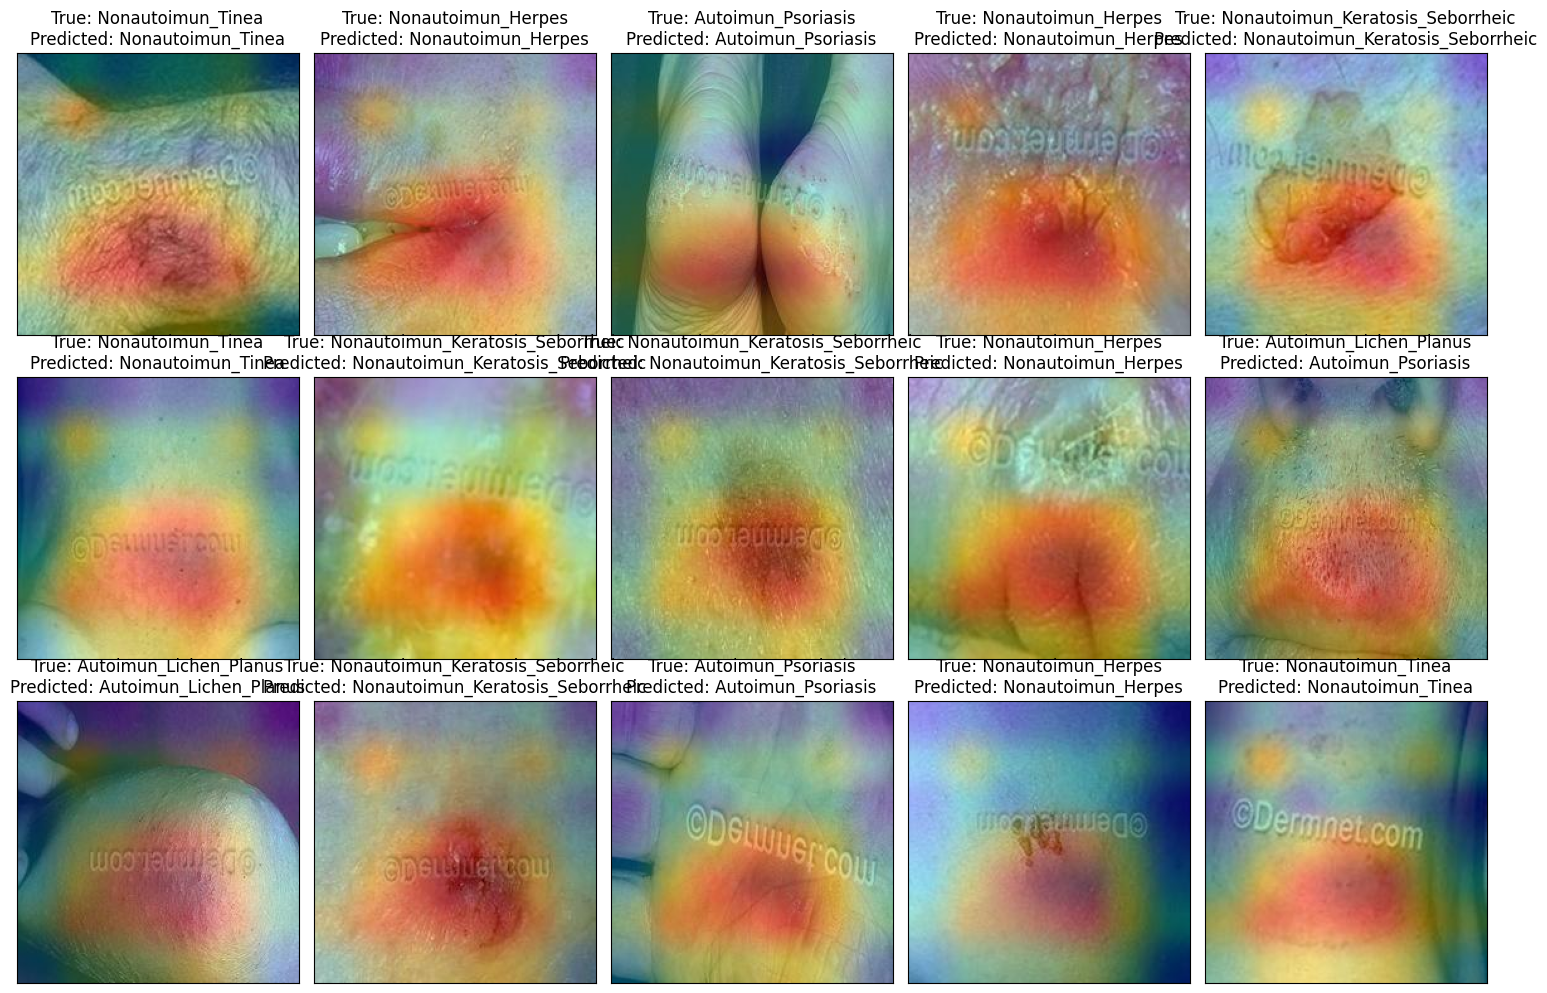

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Display the part of the pictures used by the neural network to classify the pictures
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[random_index[i]]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}")
plt.tight_layout()
plt.show()